In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

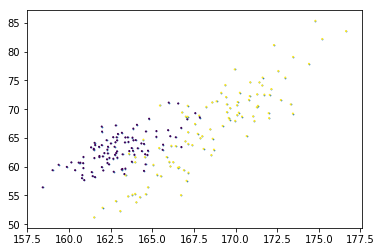

In [96]:
n_samples = 100
x1 = 3*np.random.randn(n_samples) + 168
x2 = 2*np.random.randn(n_samples) + 163
y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
x = np.concatenate((x1, x2)) ; y = np.concatenate((y1, y2))
plt.scatter(x,y, s=0.5)
X = pd.DataFrame({'height':x})
Y = pd.DataFrame({'weight':y})
Z = pd.concat([X,Y], axis=1)
Z['sex'] = n_samples*[1] + n_samples*[0]

X = Z[['height', 'weight']]
y = Z['sex']
plt.scatter(X['height'], X['weight'], c=y, s=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = SGDClassifier(max_iter=1000) # 선형분류
clf3 = RandomForestClassifier(n_estimators=200) # 랜덤 포레스트

In [97]:
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.8833333333333333

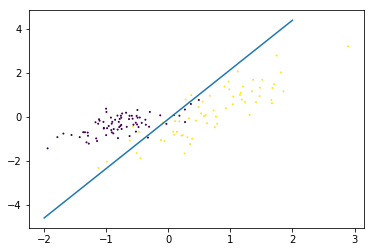

In [98]:
a = clf1.coef_[0][0] ; b = clf1.coef_[0][1] ; c = clf1.intercept_
xx = np.linspace(-2,2,10)
yy = - (a/b)*xx + c/b
plt.plot(xx,yy)
plt.scatter(X_train[:,0], X_train[:,1], s=1, c=y_train)

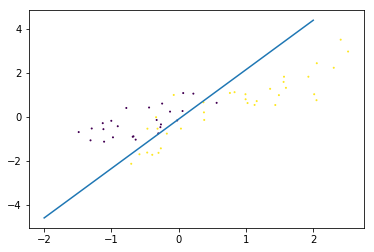

In [99]:
plt.plot(xx,yy)
plt.scatter(X_test[:,0], X_test[:,1], s=1, c=y_test)

In [105]:
X_test.shape

(60, 2)

In [104]:
df = pd.DataFrame({'y': y_test, 'y_pred': clf1.predict(X_test)})
df

,y,y_pred
174,0,0
33,1,1
173,0,0
186,0,0
22,1,1
53,1,1
134,0,0
56,1,1
143,0,1
94,1,1


In [108]:
(y_test == clf1.predict(X_test))

174     True
33      True
173     True
186     True
22      True
53      True
134     True
56      True
143    False
94      True
55      True
73      True
130     True
41      True
14     False
63      True
16      True
60      True
111    False
0       True
2       True
46      True
86      True
88      True
61     False
162     True
77      True
126     True
198     True
3       True
135     True
29     False
25      True
26     False
93      True
36      True
83      True
151     True
139     True
120     True
163     True
137     True
30      True
103     True
98      True
11      True
54      True
97      True
101     True
52      True
42      True
154     True
123     True
194     True
150     True
192     True
112     True
156    False
9       True
87      True
Name: sex, dtype: bool

In [109]:
(y_test == clf1.predict(X_test)).mean()

0.8833333333333333